In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img_ = cv2.imread('../13. Convolutional Neural Networks/Images/cody2.jpg')

In [3]:
plt.style.use("seaborn")

In [4]:
def drawImg(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title +" "+ str(img.shape))
    plt.axis("off")
    plt.show()

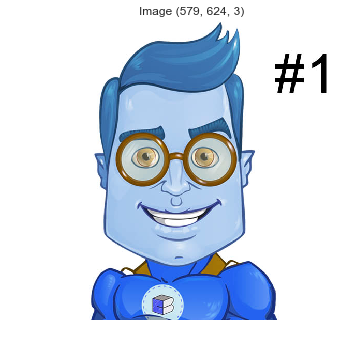

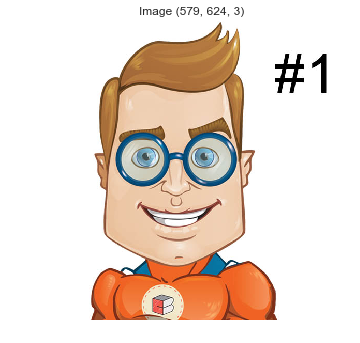

In [5]:
drawImg(img_)
img_ = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)
drawImg(img_)

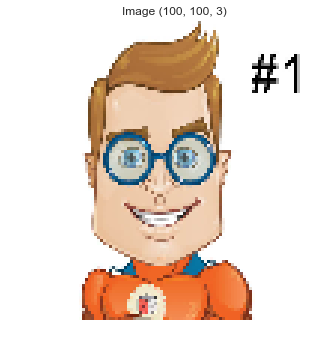

In [6]:
img_ = cv2.resize(img_, (100,100))
drawImg(img_)

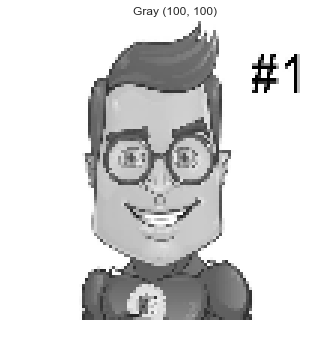

In [7]:
# Using grayscale image as RGB will require a 3D convolution filter
img_gray = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)
drawImg(img_gray, "Gray")


### Convolution Layer

In [8]:
def convolution(img, img_filter):        # Hard-coded filter, usually filters are learned by model
    W = img.shape[0]
    H = img.shape[1]
    F = img_filter.shape[0]
    
    conv_img = np.zeros((W-F+1, H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    conv_img[row][col] += img[row+i][col+j] * img_filter[i][j]
                    
            if conv_img[row][col] > 255:
                conv_img[row][col] = 255

            elif conv_img[row][col] < 0:
                conv_img[row][col] = 0
                
    return conv_img

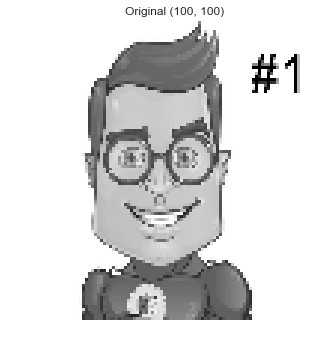

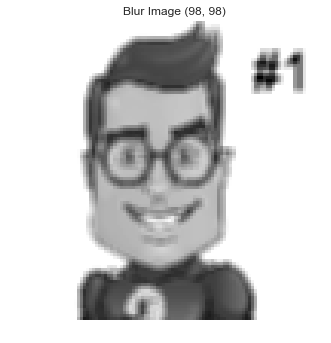

In [9]:
blur_filter = np.ones((3,3))/9.0

drawImg(img_gray, "Original")
new_img = convolution(img_gray, blur_filter)
drawImg(new_img, "Blur Image")

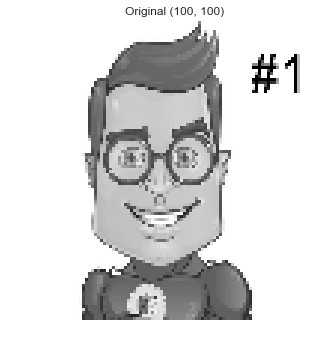

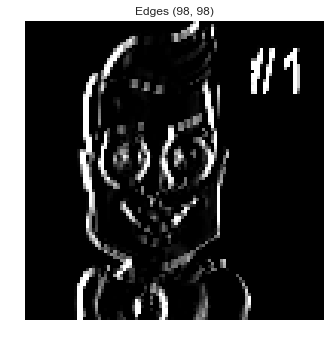

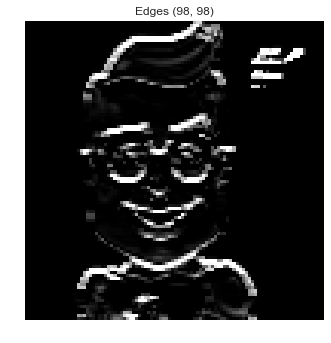

In [10]:
edge_filter = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])

drawImg(img_gray, "Original")

new_img2 = convolution(img_gray, edge_filter)
drawImg(new_img2, "Edges")

new_img3 = convolution(img_gray, edge_filter.T)
drawImg(new_img3, "Edges")

#### Padding

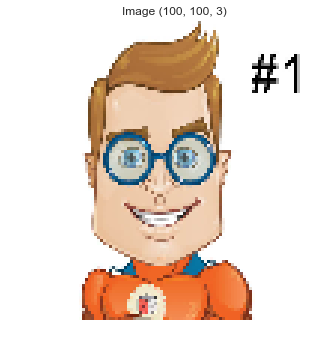

In [11]:
drawImg(img_)

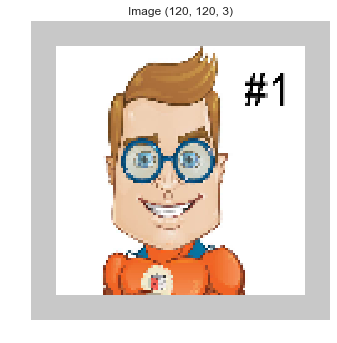

In [12]:
pad_img = np.pad(img_, ((10,10),(10,10),(0,0)), 'constant', constant_values=200)
drawImg(pad_img)

### Pooling Layer

In [13]:
def pooling(X, f, mode='max'):
    stride = f
    H, W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    output = np.zeros((HO, WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f

            X_window = X[r_start : r_end, c_start : c_end]
            
            if mode == 'max':
                output[r][c] = np.max(X_window)
            else:
                output[r][c] = np.mean(X_window)
                
    return output

In [14]:
X = np.array([[1, 0, 2, 3],
              [4, 6, 6, 8],
              [3, 1, 1, 0],
              [1, 2, 2, 4]])

pooled_X = pooling(X, 2)
print(pooled_X)

[[6. 8.]
 [3. 4.]]


In [15]:
X = np.array([[1, 0, 2, 3, 7, 5],
              [4, 6, 6, 8, 2, 5],
              [3, 1, 1, 0, 2, 1],
              [1, 2, 2, 4, 8, 2],
              [6, 3, 2, 0, 3, 1],
              [9, 5, 1, 3, 1, 8]])
pooled_X = pooling(X, 3)
print(pooled_X)

[[6. 8.]
 [9. 8.]]


In [16]:
import numpy as np

4 x 3 x 3 x 1

SyntaxError: invalid syntax (<ipython-input-16-8a9b01f21eb9>, line 3)

In [17]:
X = np.zeros((4,3,3,1))
print(X[:2])

[[[[0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]]]]


In [18]:
X[:200]

array([[[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.]]]])